In [35]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import argrelextrema
# from collections import deque
# from matplotlib.lines import Line2D
import pandas_ta as ta
# from datetime import datetime, timedelta
import datetime as dt
import os
from IPython.display import display, HTML
from tqdm import tqdm
import plotly.graph_objects as go

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


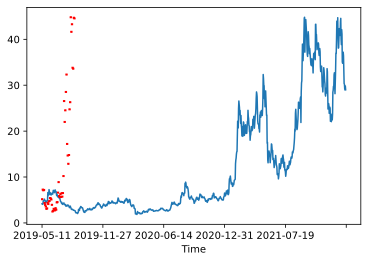

In [36]:
# dataframes = {}

# list_of_candidate=[]

timeframe='1d'
outdir=f"{os.getcwd()}/data/{timeframe}"

test=["ATOMUSDT_1d.csv"]

# for filename in os.listdir(outdir):
for filename in test:
    symbol = filename.split("_")[0]
    df = pd.read_csv(f"{outdir}/{filename}", index_col='Time')
    df['High'].plot(label="high")

    pivots=[]
    dates=[]
    counter=0
    lastPivot=0

    Range=[0,0,0,0,0,0,0,0,0,0]
    dateRange=[0,0,0,0,0,0,0,0,0,0]

    for i in df.index:
        currentMax=max(Range, default=0)
        value=round(df["High"][i], 2)

        Range=Range[1:9]
        Range.append(value)
        dateRange=dateRange[1:9]
        dateRange.append(i)

        if currentMax==max(Range, default=0):
            counter+=1
        else:
            counter=0
        if counter ==5:
            lastPivot=currentMax
            dateloc=Range.index(lastPivot)
            lastDate=dateRange[dateloc]

            pivots.append(lastPivot)
            dates.append(lastDate)
            
    timeD=str(dt.timedelta(days=30))

    for index in range(len(pivots)):
        
        # print(str(pivots[index])+": "+str(dates[index]))

        # df['High'].plot()

        plt.plot_date([dates[index],dates[index]+timeD],[pivots[index],pivots[index]],
         linestyle='-', linewidth=2, fmt="r", marker=",")
    
    plt.show()
        


In [37]:
dates

['2019-05-19',
 '2019-06-03',
 '2019-06-17',
 '2019-06-23',
 '2019-07-22',
 '2019-08-02',
 '2019-09-15',
 '2019-10-08',
 '2019-10-15',
 '2019-11-11',
 '2019-11-29',
 '2019-12-15',
 '2019-12-27',
 '2020-01-16',
 '2020-02-12',
 '2020-02-22',
 '2020-03-05',
 '2020-03-20',
 '2020-04-09',
 '2020-04-30',
 '2020-05-09',
 '2020-05-21',
 '2020-06-05',
 '2020-06-24',
 '2020-07-11',
 '2020-07-18',
 '2020-08-14',
 '2020-08-25',
 '2020-09-13',
 '2020-10-01',
 '2020-10-11',
 '2020-10-25',
 '2020-11-25',
 '2020-12-17',
 '2020-12-31',
 '2021-01-19',
 '2021-02-16',
 '2021-03-03',
 '2021-03-18',
 '2021-04-15',
 '2021-05-07',
 '2021-06-03',
 '2021-06-17',
 '2021-06-29',
 '2021-07-11',
 '2021-08-22',
 '2021-08-31',
 '2021-09-20',
 '2021-10-02',
 '2021-10-27',
 '2021-11-22',
 '2021-12-03',
 '2022-01-07',
 '2022-01-17']